<h1 align= center><font size=10>MAJOR PROJECT</h1></font>

<h1 align=centre> <font size=5> TO PREDICT CAR PRICES </font></h1>

In [4]:
import pandas as pd
import numpy as np

In [5]:
dataset_train=pd.read_excel("Data_Train.xlsx",delim_whitespaces=True)
dataset_test=pd.read_excel("Data_Test.xlsx",delim_whitespaces=True)

In [6]:
dataset_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
dataset_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

# Now Let Do Feature Engineering To clean dataset

In [8]:
dataset_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [9]:
#seprating name or brand and model name
dataset_train[["Brand","Model_Name"]]=dataset_train.Name.str.split(n=1,expand=True)
dataset_train.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [10]:
#same for our test dataset
#seprating name or brand and model name
dataset_test[["Brand","Model_Name"]]=dataset_test.Name.str.split(n=1,expand=True)
dataset_test.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model_Name
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,Maruti,Alto K10 LXI CNG
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,Maruti,Alto 800 2016-2019 LXI
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,Toyota,Innova Crysta Touring Sport 2.4 MT
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,Toyota,Etios Liva GD
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,Hyundai,i20 Magna


In [11]:
dataset_train[dataset_train["Power"].isnull()].head(2)


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95,Honda,City 1.5 GXI
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11,Maruti,Swift 1.3 VXi


In [12]:
type(dataset_train.Location)

pandas.core.series.Series

# FOR POWER AND ENGINES 

In [13]:
#for our train datasets
dataset_train.Engine=dataset_train.Engine.str.replace("CC"," ")
dataset_train.Power=dataset_train.Power.str.replace("bhp"," ")
dataset_train.Power=dataset_train.Power.str.replace("null","0")



In [14]:
#for our test dataset 

dataset_test.Engine=dataset_test.Engine.str.replace("CC"," ")
dataset_test.Power=dataset_test.Power.str.replace("bhp"," ")
dataset_test.Power=dataset_test.Power.str.replace("null","0")


In [15]:
dataset_train[dataset_train['Power'].isnull()].head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95,Honda,City 1.5 GXI
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11,Maruti,Swift 1.3 VXi
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75,Maruti,Swift 1.3 VXi


In [16]:
dataset_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Brand                 object
Model_Name            object
dtype: object

In [17]:
dataset_train.Engine=dataset_train.Engine.astype(float)
dataset_train.Power=dataset_train.Power.astype(float)

In [18]:
dataset_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                 object
Model_Name            object
dtype: object

In [19]:
#changing dtpyes of test dataset
dataset_test.Engine=dataset_test.Engine.astype(float)
dataset_test.Power=dataset_test.Power.astype(float)

In [20]:
dataset_test.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
Brand                 object
Model_Name            object
dtype: object

In [21]:
y1=dataset_train['Engine'].mean()
y2=dataset_train['Power'].mean()

In [22]:
## REPLACING NAN VALUES WITH THEIR MEAN
dataset_train.Engine.fillna(y1,inplace=True)
dataset_train.Power.fillna(y2,inplace=True)

In [23]:
dataset_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine                0
Power                 0
Seats                42
Price                 0
Brand                 0
Model_Name            0
dtype: int64

SAME OPERATIONS FOR TEST DATASET

In [24]:
y11=dataset_test['Engine'].mean()
y22=dataset_test['Power'].mean()

## REPLACING NAN VALUES WITH THEIR MEAN
dataset_test.Engine.fillna(y1,inplace=True)
dataset_test.Power.fillna(y2,inplace=True)

dataset_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                11
Brand                 0
Model_Name            0
dtype: int64

# FOR SEATS

In [25]:
#let;s analyse coloumn seats
dataset_train.Seats.dtype

dtype('float64')

In [26]:
dataset_train.Seats.fillna(dataset_train["Seats"].mean(),inplace=True)

In [27]:
dataset_train.Seats.isnull().sum()

0

In [28]:
dataset_test.Seats.isnull().sum()


11

FOR TEST DATA

In [29]:
dataset_test.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine                0
Power                 0
Seats                11
Brand                 0
Model_Name            0
dtype: int64

In [30]:
dataset_test.Seats.fillna(dataset_test["Seats"].mean(),inplace=True)

In [31]:
dataset_test[dataset_test["Seats"]==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model_Name


In [32]:
dataset_train[dataset_train["Seats"]==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197.0,0.0,0.0,18.0,Audi,A4 3.2 FSI Tiptronic Quattro


In [33]:
dataset_train.loc[3999,"Seats"]=dataset_train["Seats"].mean()

In [34]:
dataset_test.Seats.isnull().sum()
##test data now doesn't have null values..

0

In [35]:
dataset_train.describe()

,Year,Kilometers_Driven,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,1621.276450,111.227632,5.279612,9.479468
std,3.269742,9.126884e+04,599.553865,55.294789,0.803134,11.187917
min,1998.000000,1.710000e+02,72.000000,0.000000,2.000000,0.440000
25%,2011.000000,3.400000e+04,1198.000000,74.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1493.000000,93.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,5998.000000,560.000000,10.000000,160.000000


In [36]:
dataset_train[dataset_train['Price']==0.00]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name


In [37]:
dataset_train.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199.0,88.70,5.0,4.50,Honda,Jazz V


In [38]:
dataset_test.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model_Name
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998.0,58.2,4.0,Maruti,Alto K10 LXI CNG
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796.0,47.3,5.0,Maruti,Alto 800 2016-2019 LXI
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393.0,147.8,7.0,Toyota,Innova Crysta Touring Sport 2.4 MT


In [39]:
## SO NOW WE NEED TO CLEAN OUR MILEAGE COLOUMNS BECAUSE IT HAS  SOME UNWANTED FORMAT OF UNITS THAT  OUR COMPILER DOESN'T UNDERSTAND

dataset_train[dataset_train["Fuel_Type"]=="Electric"].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00,Mahindra,E Verito D4
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,Toyota,Prius 2009-2016 Z4


In [40]:
dataset_train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model_Name           0
dtype: int64

In [41]:
dataset_train["Fuel_Type"].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [42]:
dataset_train[["Mileage","Unit"]]=dataset_train.Mileage.str.split(n=1 ,expand=True)

dataset_test[["Mileage","Unit"]]=dataset_test.Mileage.str.split(n=1 ,expand=True)


In [43]:
dataset_train.dtypes


Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
Price                float64
Brand                 object
Model_Name            object
Unit                  object
dtype: object

In [44]:
dataset_test.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine               float64
Power                float64
Seats                float64
Brand                 object
Model_Name            object
Unit                  object
dtype: object

In [45]:
dataset_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name,Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.70,5.0,4.50,Honda,Jazz V,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic,kmpl


In [46]:
dataset_train.Mileage=dataset_train.Mileage.astype(float)

In [47]:
dataset_test.Mileage=dataset_test.Mileage.astype(float)

In [48]:
dataset_train.dtypes
dataset_test.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Brand                 object
Model_Name            object
Unit                  object
dtype: object

In [49]:
dataset_train=dataset_train.drop("Unit",axis=1)
dataset_test=dataset_test.drop("Unit",axis=1)

In [50]:
dataset_train.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option


In [51]:
dataset_train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model_Name           0
dtype: int64

In [52]:
mean1=dataset_train["Mileage"].mean()
mean1

18.134960943992024

In [53]:
dataset_train[dataset_train["Mileage"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.00,Mahindra,E Verito D4
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,12.75,Toyota,Prius 2009-2016 Z4


In [54]:
dataset_train.loc[[4446,4904],"Mileage"]=mean1

In [55]:
##So now our train data doesn't have na values
dataset_train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
Model_Name           0
dtype: int64

NOW FOR TEST DATA

In [56]:
dataset_test.isnull().sum()


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Brand                0
Model_Name           0
dtype: int64

In [57]:
dataset_test.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Brand                 object
Model_Name            object
dtype: object

In [58]:
dataset_train.Brand.unique()


array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

In [59]:
dataset_test.Brand.unique()

array(['Maruti', 'Toyota', 'Hyundai', 'Mahindra', 'Honda', 'Audi',
       'Nissan', 'BMW', 'Ford', 'Skoda', 'Volkswagen', 'Mitsubishi',
       'Mercedes-Benz', 'Tata', 'Chevrolet', 'Datsun', 'Jaguar', 'Fiat',
       'Hindustan', 'Renault', 'Mini', 'Bentley', 'Land', 'Volvo',
       'Isuzu', 'Jeep', 'Porsche', 'ISUZU', 'OpelCorsa'], dtype=object)

In [60]:
##since brand name  "ISUZU" and "Isuzu" are same:therefore combining to same
dataset_train.loc[dataset_train["Brand"]=='ISUZU',['Brand']]="Isuzu"
dataset_test.loc[dataset_test["Brand"]=="ISUZU","Brand"]="Isuzu"

In [61]:
dataset_train[dataset_train["Price"]==0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name


In [62]:
dataset_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [63]:
dataset_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model_Name'],
      dtype='object')

In [64]:
import seaborn as sns
sns.set()
## "pip install cufflinks"
import cufflinks as cf
cf.go_offline()
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
dataset_train.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model_Name
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [66]:
dataset_train[["Fuel_Type","Price"]].pivot(columns="Fuel_Type",values="Price").iplot(x="Fuel_Type",y="Price",kind="box",xTitle="Fuel_type",yTitle="Price in lakhs",title="Fuel_Type vs Price")
## this shows that Fuel_Type is important feature for price

In [67]:
dataset_train[["Owner_Type","Price"]].pivot(columns="Owner_Type",values="Price").iplot(x="Owner_Type",y="Price",kind="box",title="Owner_Type vs Price",xTitle="Owner_Type",yTitle="Price in lakhs")
## thus owner type is also an important in determining price of car

In [68]:
dataset_train[["Seats","Price"]].pivot(columns="Seats",values="Price").iplot(x="Seats",y="Price",kind="box",xTitle="No of Seats",yTitle="Price in Lakh")

# so cars with less seats have more prices

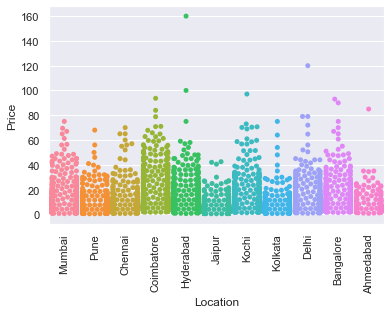

In [69]:
plt.xticks(rotation=90)
sns.swarmplot(x=dataset_train["Location"],y=dataset_train["Price"],data=dataset_train,)

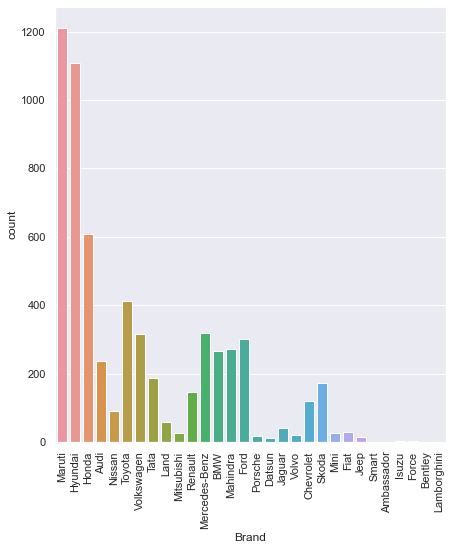

In [110]:
plt.figure(figsize=(7,8),edgecolor='b')
plt.xticks(rotation=90)
sns.countplot(x=dataset_train["Brand"])

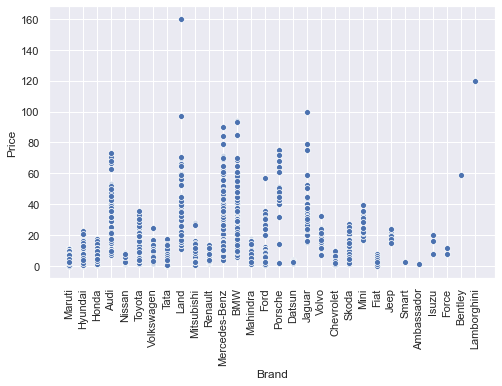

In [71]:
plt.figure(figsize=(8,5),edgecolor='b')
plt.xticks(rotation=90)
sns.scatterplot(x=dataset_train["Brand"],y=dataset_train["Price"])

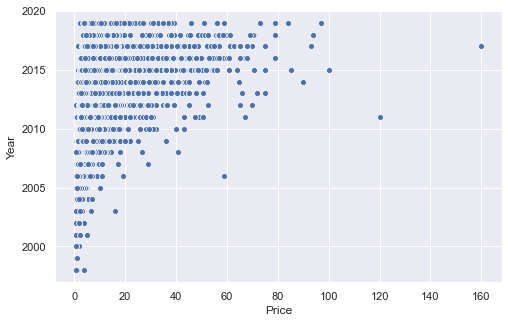

In [72]:
plt.figure(figsize=(8,5),edgecolor='b')
plt.xticks(rotation=0)
sns.scatterplot(y=dataset_train["Year"],x=dataset_train["Price"])

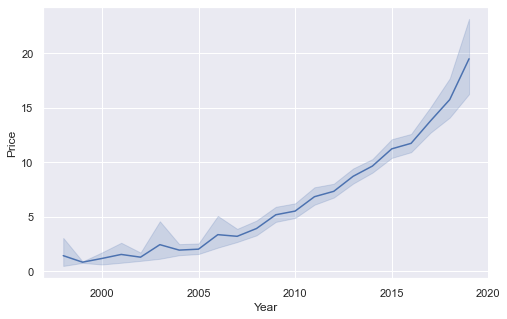

In [73]:
plt.figure(figsize=(8,5),edgecolor='b')
plt.xticks(rotation=0)
sns.lineplot(x=dataset_train["Year"],y=dataset_train["Price"])
##so here we can deduce that as time increases price also increases

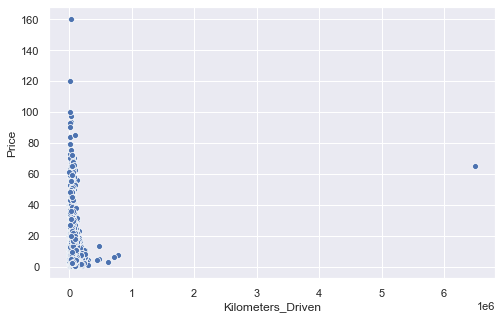

In [74]:
plt.figure(figsize=(8,5),edgecolor='b')
plt.xticks(rotation=0)
sns.scatterplot(y=dataset_train["Price"],x=dataset_train["Kilometers_Driven"])
##so as Driven distance increases price also decreases

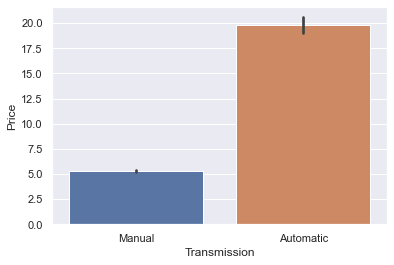

In [75]:
sns.barplot(x="Transmission",y="Price",data=dataset_train)

### SO IMPORTANT  FEATURES ARE :>>

### Location, Year, Owner Type, Brand of Cars , Seats,  Transmission , Power, Mileage, Engine and also Fuel Type

#           MODEL FRAME WORKING AND EXECUTION

#  a)>>One Hot Encoding

### BRAND

In [76]:
brand_train=pd.get_dummies(dataset_train["Brand"],drop_first=True)
brand_test=pd.get_dummies(dataset_test["Brand"],drop_first=True)


In [77]:
brand_train.head(2)


,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [78]:
brand_test.head(2)

,BMW,Bentley,Chevrolet,Datsun,Fiat,Ford,Hindustan,Honda,Hyundai,Isuzu,...,Mitsubishi,Nissan,OpelCorsa,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### OWNER_TYPE

In [79]:
owner_type_train=pd.get_dummies(dataset_train["Owner_Type"],drop_first=True)
owner_type_train.head(2)

,Fourth & Above,Second,Third
0,0,0,0
1,0,0,0


In [80]:
owner_type_test=pd.get_dummies(dataset_test["Owner_Type"],drop_first=True)
owner_type_test.head(2)

,Fourth & Above,Second,Third
0,0,0,0
1,0,1,0


### FUEL_TYPE

In [81]:
fuel_type_train=pd.get_dummies(dataset_train["Fuel_Type"],drop_first=True)
fuel_type_train.head(2)

,Diesel,Electric,LPG,Petrol
0,0,0,0,0
1,1,0,0,0


In [82]:
fuel_type_test=pd.get_dummies(dataset_test["Fuel_Type"],drop_first=True)
fuel_type_test.head(2)

,Diesel,LPG,Petrol
0,0,0,0
1,0,0,1


In [83]:
dataset_test.Fuel_Type.unique()

array(['CNG', 'Petrol', 'Diesel', 'LPG'], dtype=object)

 ### TRANSMISSION

In [84]:
transmission_train=pd.get_dummies(dataset_train["Transmission"],drop_first=True)
transmission_train.head(2)

,Manual
0,1
1,1


In [85]:
transmission_test=pd.get_dummies(dataset_test["Transmission"],drop_first=True)
transmission_test.head(2)

,Manual
0,1
1,1


### LOCATION

In [86]:
location_train=pd.get_dummies(dataset_train["Location"],drop_first=True)

In [87]:
location_train.head(2)

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1


In [88]:
location_test=pd.get_dummies(dataset_test["Location"],drop_first=True)

In [89]:
location_test.head(2)

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0


# b)>>generating test and train data

In [90]:
X=dataset_train[["Year","Seats","Mileage","Engine","Power"]]

In [91]:
type(X)

pandas.core.frame.DataFrame

In [92]:
X=pd.concat([X,location_train,brand_train,owner_type_train,fuel_type_train,transmission_train],axis=1)
X.head(5)

,Year,Seats,Mileage,Engine,Power,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,...,Volkswagen,Volvo,Fourth & Above,Second,Third,Diesel,Electric,LPG,Petrol,Manual
0,2010,5.0,26.60,998.0,58.16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2015,5.0,19.67,1582.0,126.20,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2011,5.0,18.20,1199.0,88.70,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2012,7.0,20.77,1248.0,88.76,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2013,5.0,15.20,1968.0,140.80,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


In [93]:
y=dataset_train["Price"]

# MODEL IMPLEMENTATION

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [113]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [114]:
model.fit(X_train , y_train)

LinearRegression()

In [115]:
y_predicted=model.predict(X_test)

In [116]:
from sklearn import metrics

In [118]:
metrics.r2_score(y_test,y_predicted)

0.7638375731879404

####   By only fitting data using Linear Regression we have an accuracy of 76.38%. Next we will try to use a pipeline and see if we get better results.

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [120]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [121]:
pipe=Pipeline(Input)
model=pipe.fit(X,y)
pipe.score(X,y)
## thus by pipeline our accuracy increases

0.9370981945800407

In [122]:
y_pred=pipe.predict(X_test)

# ACCURACY SCORE

In [123]:
metrics.r2_score(y_test,y_pred)

0.9480696853118158

In [124]:
prices_predicted=pd.Series(model.predict(X_train))

In [125]:
prices_predicted.mean()
## this is predicted price value mean from train dataset

9.456918601996788

In [126]:
y.mean()
## this is actual mean of price value from train dataset

9.47946835022429

In [127]:
X_dataset_test=dataset_test[["Year","Seats","Mileage","Engine","Power"]]

In [128]:
X_dataset_test=pd.concat([X_dataset_test,location_test,brand_test,owner_type_test,fuel_type_test,transmission_test],axis=1)
X_dataset_test.head(5)

,Year,Seats,Mileage,Engine,Power,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,...,Toyota,Volkswagen,Volvo,Fourth & Above,Second,Third,Diesel,LPG,Petrol,Manual
0,2014,4.0,32.26,998.0,58.20,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2013,5.0,24.70,796.0,47.30,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,1
2,2017,7.0,13.68,2393.0,147.80,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,2012,5.0,23.59,1364.0,0.00,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
4,2014,5.0,18.50,1197.0,82.85,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [130]:
X_dataset_test.columns

Index(['Year', 'Seats', 'Mileage', 'Engine', 'Power', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat',
       'Ford', 'Hindustan', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep',
       'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini', 'Mitsubishi',
       'Nissan', 'OpelCorsa', 'Porsche', 'Renault', 'Skoda', 'Tata', 'Toyota',
       'Volkswagen', 'Volvo', 'Fourth & Above', 'Second', 'Third', 'Diesel',
       'LPG', 'Petrol', 'Manual'],
      dtype='object')

In [ ]:
dataset_train.